In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.head()   

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isnull().sum()    

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.shape 

(10000, 3)

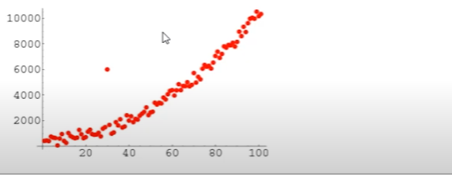

In [7]:
from PIL import Image
img=Image.open("day_40.PNG")   
img 

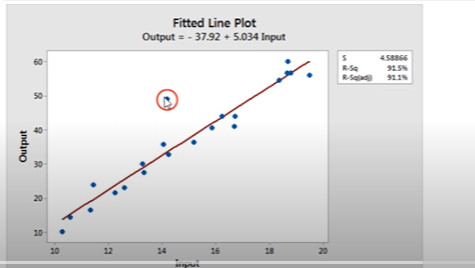

In [8]:
from PIL import Image
img=Image.open('day_40_img2.PNG')  
img                               

<AxesSubplot:xlabel='Weight', ylabel='Count'>

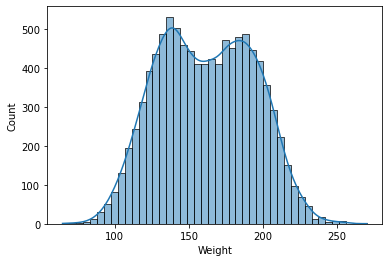

In [9]:
sns.histplot(df['Weight'], kde=True)

In [10]:
mean_value= df['Weight'].mean()  # mean value calculate
mean_value

161.44035683283076

In [11]:
std_value= df['Weight'].std()  #Calculate Standard Deviation
std_value

32.108439006519546

In [25]:
std_plus_3= mean_value + (2.5 * std_value)  # 2.5 Standard Deviation 
std_plus_3

241.7114543491296

In [26]:
std_neg_3= mean_value - (2.5 * std_value)  # 2.5 Standard Deviation 
std_neg_3

81.16925931653189

In [27]:
df[df['Weight']>std_plus_3]  # 2.5 Standard Deviation outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [28]:
df[df['Weight']<std_neg_3] #Outlier 

,Gender,Height,Weight
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7935,Female,58.211650,77.523774
8241,Female,56.167299,77.898559
9285,Female,54.263133,64.700127
9566,Female,57.353093,72.750145


In [29]:
merge_outliers= df[(df['Weight']>std_plus_3) | (df['Weight']<std_neg_3)]  # Merge two type of outliers
merge_outliers  

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [30]:
merge_outliers.shape  # Merge outlier shape

(27, 3)

In [31]:
remove_out_columns=df[(df['Weight']< std_plus_3) & (df['Weight'] > std_neg_3)]
remove_out_columns

,Gender,Height,Weight
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [32]:
remove_out_columns.shape    # removal outlier shape 

(9973, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

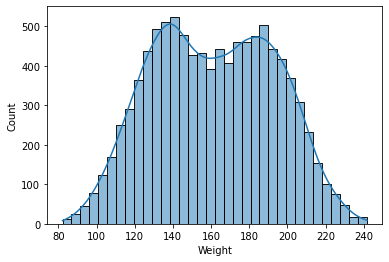

In [34]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [35]:
#One Hot Encoding
dummy_variables=pd.get_dummies(remove_out_columns['Gender'], drop_first=True)  

In [36]:
dummy_variables

,Male
1,1
2,1
3,1
4,1
5,1
...,...
9995,0
9996,0
9997,0
9998,0


In [37]:
new_df= remove_out_columns.drop('Gender',axis=1) 

In [38]:
new_df

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [40]:
df=pd.concat([new_df, dummy_variables], axis=1)   #Concatanation(Concat) two data frame

In [41]:
df

,Height,Weight,Male
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [43]:
df.head()   

,Height,Weight,Male
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1


In [44]:
df.tail()  

,Height,Weight,Male
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0
9999,61.944246,113.649103,0


In [47]:
x=df.drop('Height', axis=1)

In [48]:
y=df['Height']

In [50]:
x.head()

,Weight,Male
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1
5,152.212156,1


In [51]:
y.head()

1    68.781904
2    74.110105
3    71.730978
4    69.881796
5    67.253016
Name: Height, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
#split dataset into train and test
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=.30, random_state=42)

In [55]:
xtrain.shape

(6981, 2)

In [56]:
xtest.shape

(2992, 2)

In [57]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [58]:
reg= LinearRegression()  #create linear reg object

In [59]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [60]:
reg.coef_   # coefficient in linear regression

array([ 0.122874  , -0.94620162])

In [61]:
reg.intercept_  # value of intercept

47.011021679886326

In [62]:
reg.predict(xtest)

array([65.93908337, 71.2885776 , 69.35055021, ..., 66.50690792,
       63.97453349, 62.64210708])

In [63]:
reg.predict(xtest).shape

(2992,)

In [64]:
pred= reg.predict(xtest)

In [66]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
mean_squared_error(ytest, pred)

2.1062111119133315

In [68]:
r2_score(ytest, pred)

0.8554817940443755

In [70]:
so, our model Accuracy is 85.54%